### Imports & Preparation

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Checkpoint Loading

In [2]:
checkpoint = torch.load('../../models3D/new/model_detector_3d_batched_e43.t7')

epoch = len(checkpoint['train_time'])

train_time = checkpoint['train_time']
test_time = checkpoint['test_time']

train_epoch_loss = checkpoint['train_epoch_loss']
train_epoch_acc = checkpoint['train_epoch_acc']
train_epoch_C0_acc = checkpoint['train_epoch_C0_acc']
train_epoch_C1_acc = checkpoint['train_epoch_C1_acc']

train_batch_loss = checkpoint['train_batch_loss']
train_batch_acc = checkpoint['train_batch_acc']
train_batch_C0_acc = checkpoint['train_batch_C0_acc']
train_batch_C1_acc = checkpoint['train_batch_C1_acc']

test_loss = checkpoint['test_loss']
test_acc = checkpoint['test_acc']
test_C0_acc = checkpoint['test_C0_acc']
test_C1_acc = checkpoint['test_C1_acc']


total_train_time =sum(train_time)
total_test_time = sum(test_time)
total_time = total_train_time + total_test_time

print ("Total time: %.2fh" % (total_time / 3600))
print ("Total Train time: %.2fh (%.1f%%)" % (total_train_time / 3600, total_train_time / total_time * 100))
print ("Total Test time: %.2fh (%.1f%%)" % (total_test_time / 3600, total_test_time / total_time * 100))

FileNotFoundError: [Errno 2] No such file or directory: '../../models3D/new/model_detector_3d_batched_e43.t7'

In [3]:
checkpoint['train_settings']

[{'learning_rate': 8e-05,
  'k': 20,
  'scheduler': <torch.optim.lr_scheduler.CosineAnnealingLR at 0x21f8c427588>,
  'epochs': 50,
  'seed': 34897567,
  'batch_size': 12,
  'bins': 20}]

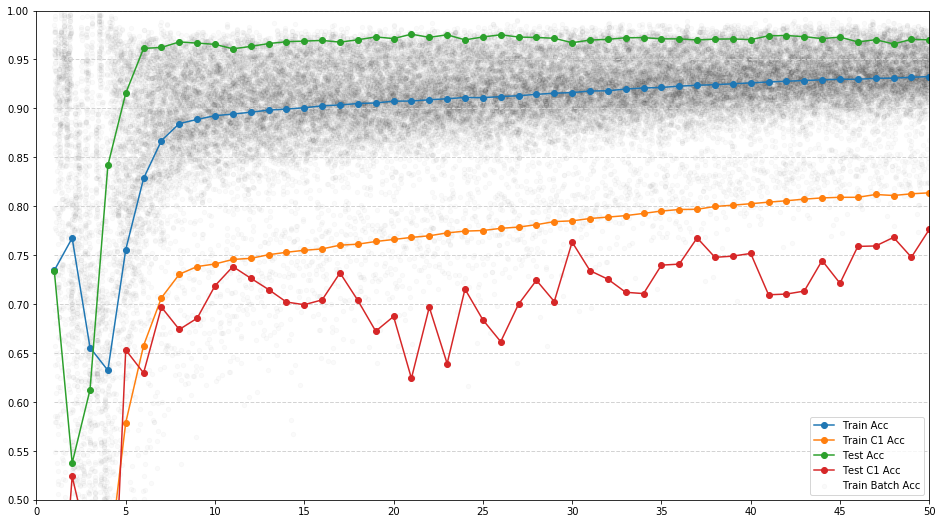

In [3]:
start = 1
end = len(train_batch_acc)
#end = 20
step = 0.05
y_ticks = np.arange(0.5, 1.0 + step, step)

# -------------------------------------------------------------------------------------

N = end - start + 1

train_batch_acc_np = np.array(train_batch_acc)[start:end+1].reshape(-1)

plt.figure(figsize=(16,9))
plt.ylim(y_ticks[0], y_ticks[-1])
plt.xlim(start, end)

x = np.arange(start, end+1, 1)
x_cont = np.linspace(start, end, train_batch_acc_np.shape[0])

plt.scatter(x_cont, train_batch_acc_np, label='Train Batch Acc', color = (0.0,0.0,0.0,0.02), s=20)
plt.plot(x, train_epoch_acc[start-1:end], label='Train Acc', marker='o')

#plt.plot(x, train_epoch_C0_acc[start-1:end], label='C0 Acc', marker='o')
plt.plot(x, train_epoch_C1_acc[start-1:end], label='Train C1 Acc', marker='o')

plt.plot(x, test_acc[start-1:end], label='Test Acc', marker='o')
plt.plot(x, test_C1_acc[start-1:end], label='Test C1 Acc', marker='o')


plt.hlines(y_ticks, start, end, color='lightgrey', linewidths=1, linestyles='dashed')

plt.xticks(np.arange(start-1,end+1,5).astype(int))
plt.yticks(y_ticks)

plt.legend(loc = 'lower right')

(100,)


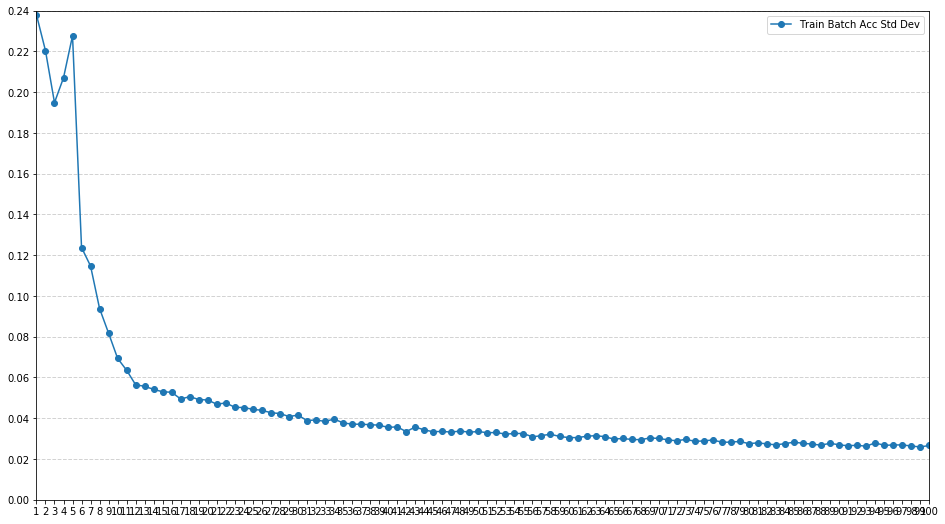

In [22]:
N = len(train_epoch_acc)

step = 0.02
y_ticks = np.arange(0.0, 0.24 + step, step)

train_batch_acc_np = np.std(np.array(train_batch_acc), axis = 1)

print (train_batch_acc_np.shape)

plt.figure(figsize=(16,9))
plt.ylim(y_ticks[0], y_ticks[-1])
plt.xlim(1, N)
plt.plot(1 + np.arange(0,N), train_batch_acc_np, label='Train Batch Acc Std Dev', marker='o')

plt.yticks(y_ticks)
plt.hlines(y_ticks, 1, N, color='lightgrey', linewidths=1, linestyles='dashed')
plt.xticks(np.arange(1,N+1).astype(int))
plt.legend(loc = 'upper right')